In [67]:
#Importing the Libraries
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC  


In [ ]:
#Data Collection and Preparation
#Read The Data Set
df=pd.read_csv("E:\\NMDS\collegePlace.csv")
df.head()

In [3]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [10]:
#Handling Mising Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 162.3+ KB


In [2]:
#Handling Mising Values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [13]:
#Handling Categorical Values
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [12]:
#Handling Outliers
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.displot(feature)
    transformationplot(np.log(df['Age']))
    plt.show()

<AxesSubplot:xlabel='Age'>

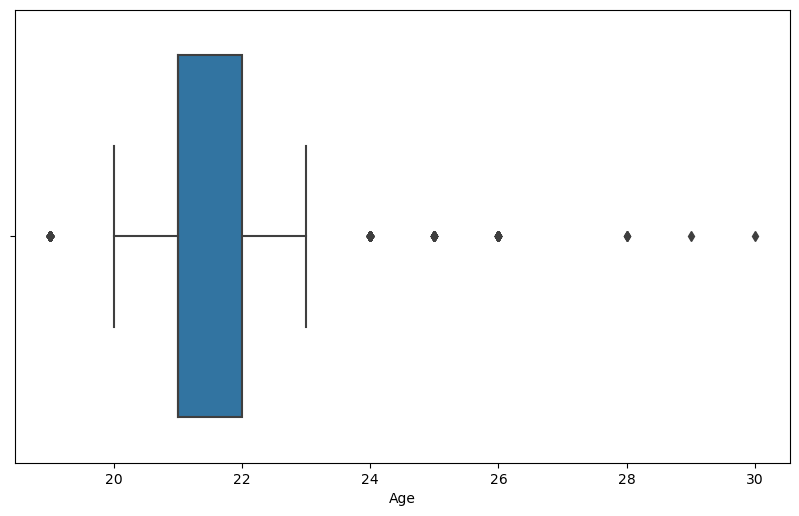

In [14]:
# I tried all the columns and find out that only age column has some outliers.

plt.figure(figsize = (10, 6), dpi = 100)
sns.boxplot(x = "Age", data = df)

In [15]:
#Removing Outlier
max_thresold = df['Age'].quantile(0.95)
print(max_thresold)

min_thresold = df['Age'].quantile(0.01)
print(min_thresold)

df = df[(df['Age']<max_thresold) & (df['Age']>min_thresold)]

24.0
19.0


In [16]:
#Handling Categorical values
#Lable Encoding
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,4,3,5])
df.drop(['Hostel'],axis=1)

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,4,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,4,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


<Axes: xlabel='Stream', ylabel='count'>

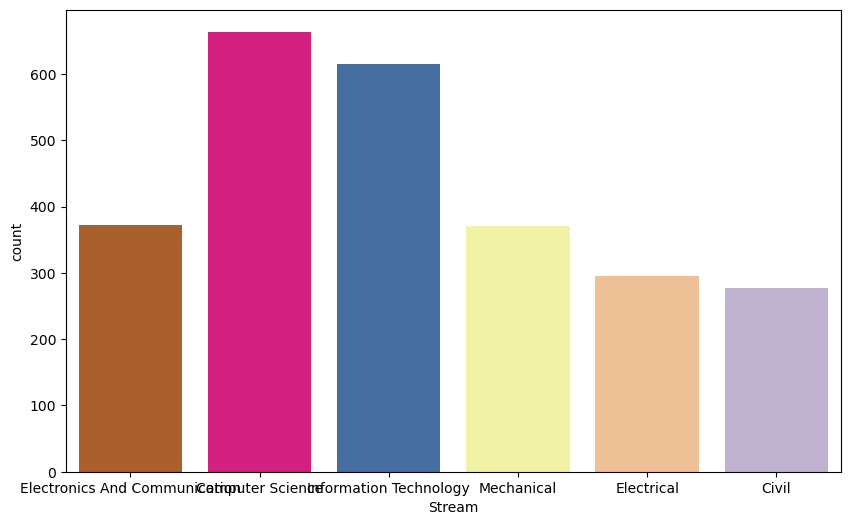

In [25]:
#Exploratory Data Abnliysis
#Data Visualization count of stream
plt.figure(figsize = (10, 6), dpi = 100)
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)
sns.countplot(x = "Stream", data = df)

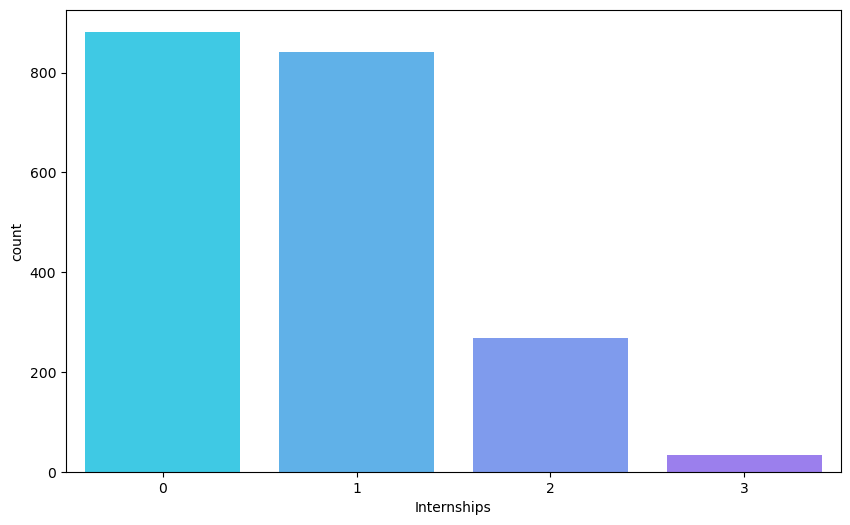

In [27]:
#Data Visualization count of Internships
plt.figure(figsize = (10, 6), dpi = 100)
color_palette = sns.color_palette("cool")
sns.set_palette(color_palette)
sns.countplot(x = "Internships", data = df)
plt.show()

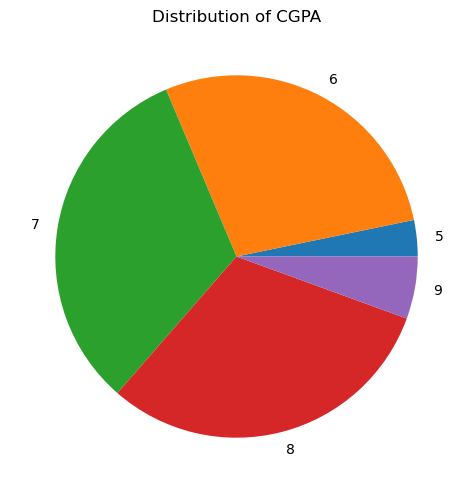

In [5]:
#Data Visualization  Distribution of CGPA
plt.figure(figsize = (10, 6), dpi = 100)
grp = dict(df.groupby('CGPA').groups)

m = {}

for key, val in grp.items():
    
    if key in m:
        m[key] += len(val)
        
    else:
        m[key] = len(val)

    
plt.title("Distribution of CGPA")
plt.pie(m.values(), labels = m.keys())
plt.show()

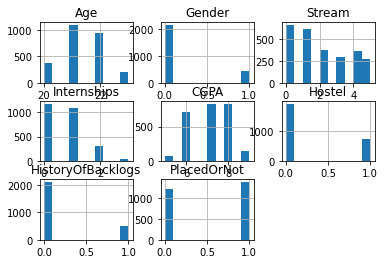

In [24]:
#Univariate Analysis
df.hist()
plt.show()

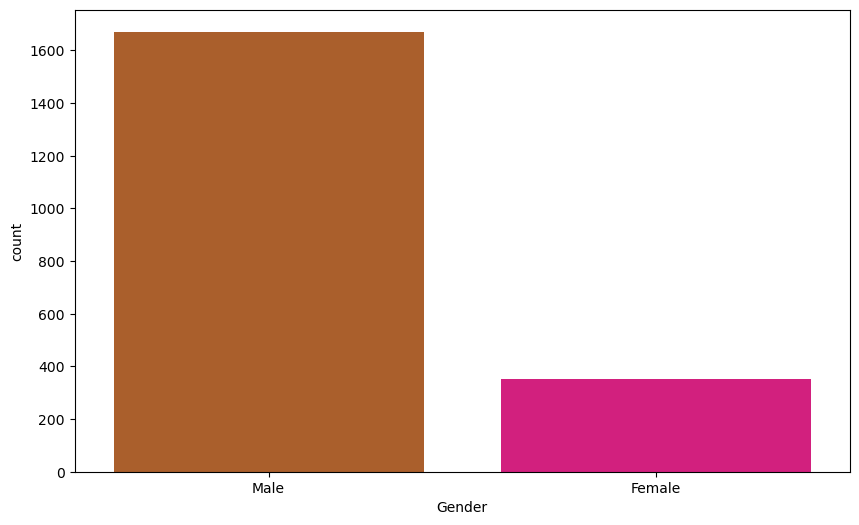

In [31]:
plt.figure(figsize = (10, 6), dpi = 100)
# setting the different color palette
color_palette = sns.color_palette("Accent_r")
sns.set_palette(color_palette)

sns.countplot(x = "Gender", data = df)

plt.show()

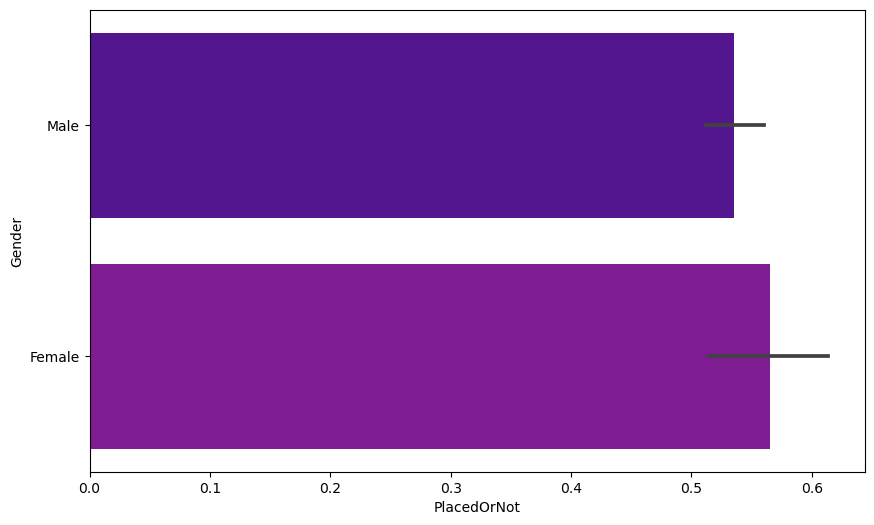

In [33]:
#Relationships
#Multivariate Analysis
plt.figure(figsize = (10, 6), dpi = 100)
# setting the different color palette
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)
sns.barplot(x = "PlacedOrNot", y = "Gender", data = df)
plt.show()

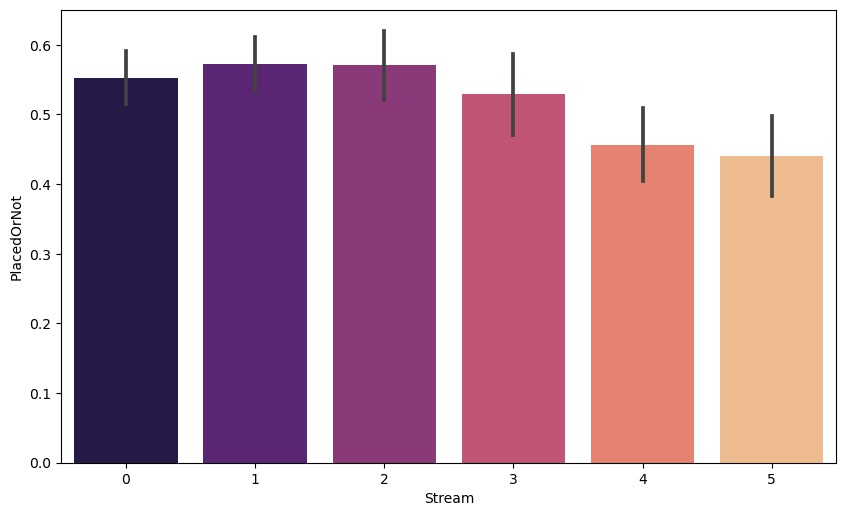

In [33]:
#Multivariate Analysis
plt.figure(figsize = (10, 6), dpi = 100)
# setting the different color palette
color_palette = sns.color_palette("magma")
sns.set_palette(color_palette)
sns.barplot(x = "Stream", y = "PlacedOrNot", data = df)
plt.show()

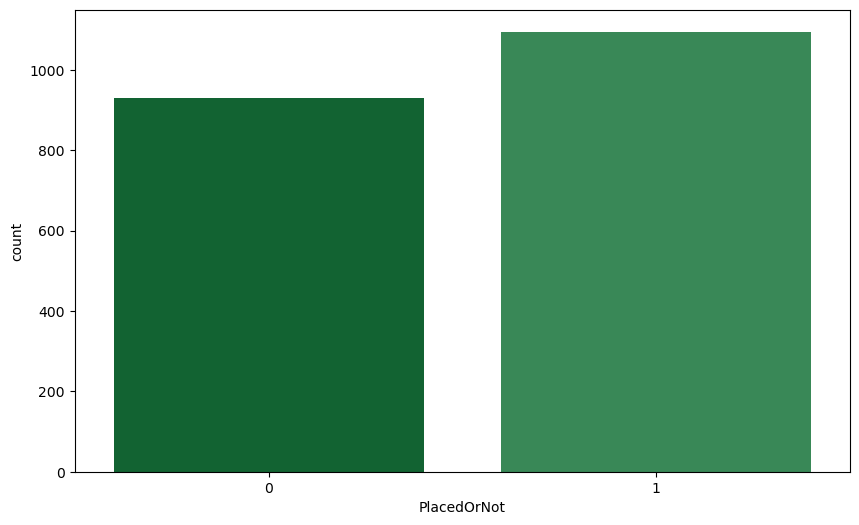

In [35]:
# How many placed
plt.figure(figsize = (10, 6), dpi = 100)


# setting the different color palette
color_palette = sns.color_palette("BuGn_r")
sns.set_palette(color_palette)

sns.countplot(x = "PlacedOrNot", data = df)

plt.show()


<AxesSubplot:>

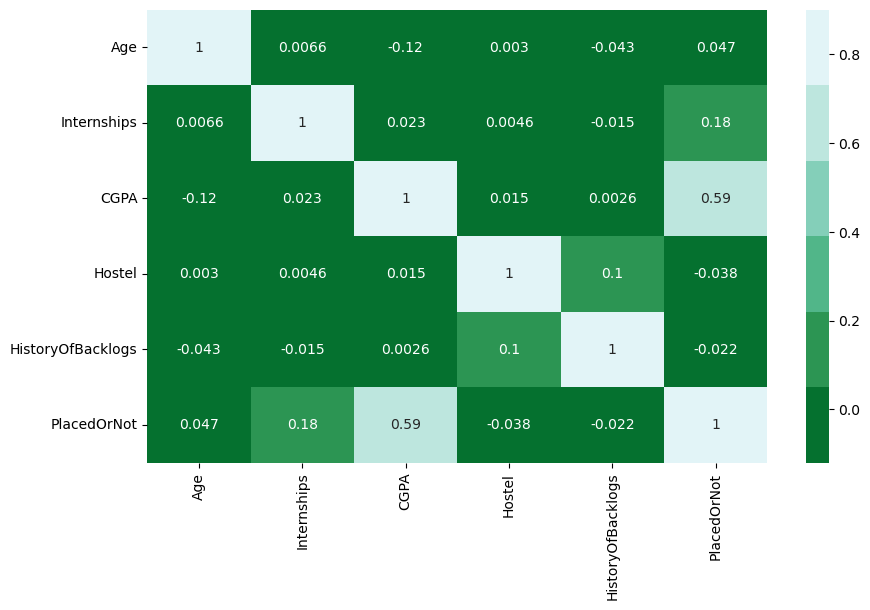

In [6]:
#Scaling the Data
#Correllation
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("BuGn_r")
sns.heatmap(df.corr(), vmax=0.9, annot=True,cmap = color)

In [8]:
#Model Building
#mode1:SVM
classifier=svm.SVC(kernel='linear')


0.88
0.96


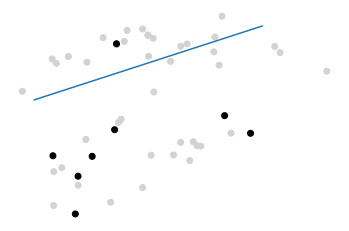

In [18]:
#mode1:SVM
import numpy as np
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.model_selection import train_test_split
 classes = 4
X,t= make_classification(100, 5, n_classes = classes, random_state= 40, n_informative = 2, n_clusters_per_class = 1)
#%%
X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)
#%%
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#%%
model.fit(X_train, y_train)
#%%
y=model.predict(X_test)
y2=model.predict(X_train)
#%%
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print(score)
score2 =accuracy_score(y2, y_train)
print(score2)
#%%
import matplotlib.pyplot as plt
color = ['black' if c == 0 else 'lightgrey' for c in y]
plt.scatter(X_train[:,0], X_train[:,1], c=color)
 
# Create the hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (model.intercept_[0]) / w[1]
 
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [43]:
# Spot-Check Algorithms
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  #  kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, scoring='accuracy')
results.append(cv_results)
names.append(name)
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

SVM: 0.920000 (0.040000)


In [63]:
# KNN Classification
#Handling Categorical values
#Lable Encoding
df=pd.read_csv("E:\\NMDS\collegePlace.csv")
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,4,3,5])
df.drop(['Hostel'],axis=1)
#from pandas import read_csv
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
#df = read_csv(filename, names=names)
array = df.values
X = array[:,0:7]
Y = array[:,7]
#num_folds = 5
#kfold = KFold(n_splits=5, random_state=3)
model = KNeighborsClassifier()
results = cross_val_score(model,X,Y)
print(results.mean())

0.8334491627914898


In [66]:
import pikle
import joblib
pickle.dump((knn,open("placement.pkl","wb"))
model=pickle.load(open("placement.pkl","rb")))

SyntaxError: invalid syntax (1839017592.py, line 4)

In [ ]:
from flask 